We want to start a new mobile phone manufacturing company and we would like to decide the price range of the mobile phone. 

So we have done market studies and collected information of around 2000 mobile phones with 4 levels of price range:

(0 being lowest, 3 being higest price tag)


The dataset contains the information about features of mobile phones and corresponding sales price tag  ( 4 levels).

##**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics


In [2]:
train = pd.read_csv('Model_Selection_train.csv')
test = pd.read_csv('Model_Selection_test.csv')

In [3]:
train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


###**Data Visualisation**

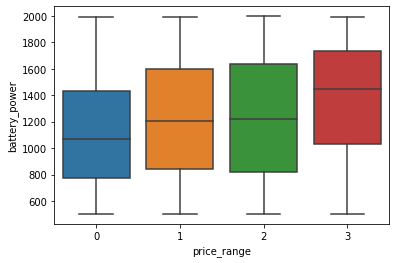

In [4]:
sn.boxplot(x = 'price_range', y = 'battery_power', data = train);

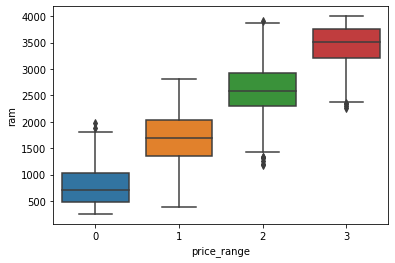

In [5]:
sn.boxplot(x = 'price_range', y = 'ram', data = train);

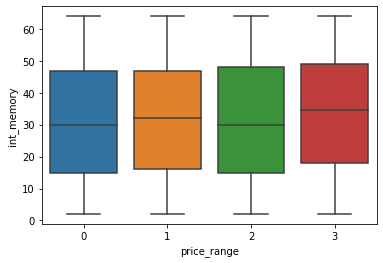

In [6]:
sn.boxplot(x = 'price_range', y = 'int_memory', data = train);

##**Feature engineering**

In [8]:
train = pd.read_csv('Model_Selection_train.csv')
test = pd.read_csv('Model_Selection_test.csv')

In [9]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
train.price_range = train.price_range.astype('category')

In [11]:
test.shape
train.shape

(2000, 21)

##**Modelling**

###**basic KNN model**

<p> drop column "price_range", because it is dependence variable (target) </p>

In [12]:
X = train.drop(['price_range'], axis = 1)

In [13]:
X.shape

(2000, 20)

In [14]:
y = train['price_range']

In [15]:
y.shape

(2000,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)


In [17]:
X_test.shape

(400, 20)

In [18]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(X_test)

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.9275

###**Cross validation score**

**X fold cross validation**

1. Split the data into X equal paritions / folds

2. use fold 1 as the test set and the (X-1) folds as train set

3.  Calculate test accuracy

4.  Repeat these steps 2, 3 for X times

5. Use the average of all these X testing accuracies as the estimate of sample accuracy

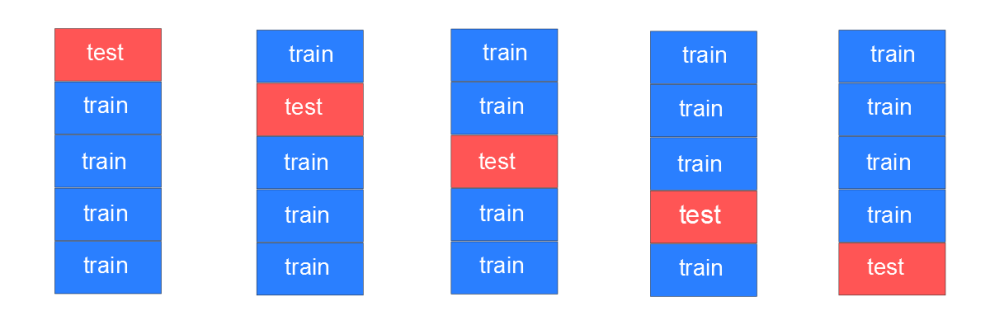

In [21]:
knn = KNeighborsClassifier(n_neighbors= 5)


In [22]:
scores = cross_val_score(knn, X, y , cv = 10, scoring= 'accuracy')

In [23]:
print(scores)

[0.9   0.94  0.92  0.935 0.925 0.95  0.915 0.915 0.915 0.92 ]


In [24]:
print(scores.mean())

0.9235000000000001


In [25]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean())

In [26]:
k_scores

[0.908,
 0.8950000000000001,
 0.9195,
 0.9094999999999999,
 0.9195,
 0.9205,
 0.925,
 0.9245000000000001,
 0.931,
 0.9315,
 0.9345000000000001,
 0.93,
 0.9339999999999999,
 0.929,
 0.9299999999999999,
 0.9279999999999999,
 0.9315,
 0.9305,
 0.932,
 0.93,
 0.9295000000000002,
 0.9295000000000002,
 0.9325000000000001,
 0.9280000000000002,
 0.931,
 0.9339999999999999,
 0.933,
 0.9324999999999999,
 0.9305,
 0.9295,
 0.932,
 0.9285,
 0.9280000000000002,
 0.9275,
 0.9289999999999999,
 0.9239999999999998,
 0.9245000000000001,
 0.9244999999999999,
 0.9260000000000002,
 0.9264999999999999]

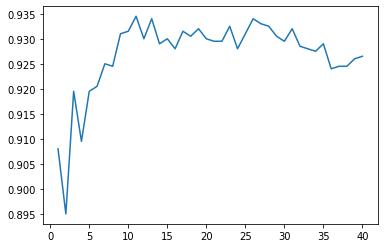

In [27]:
sn.lineplot(x = k_range, y = k_scores);
